# Практическая работа №3: Частотный анализ полиномиальных приближений

Выполнили студентки гр. 0382 Деткова Анна и Рубежова Наталия. Вариант №11.

## Цель работы

Провести анализ частотных характеристик известных формул полиномиального сглаживания временных рядов.

## Основные теоретические положения
*__Нерекурсивным дискретным фильтром__* называют тип фильтра, в котором выходной сигнал зависит только от входного сигнала и предыдущих значений входного сигнала, без обратной связи. Это означает, что влияние фильтра на сигнал осуществляется только текущим входным сигналом и, возможно, некоторыми предыдущими значениями входного сигнала. <br><br>

При $s_n=e^{i\omega n}$ передаточная функция нерекурсивного фильтра имеет вид:

$H(w)=\sum_{k=0}^{N}a_ke^{-i\omega k} \qquad y_n=H(w)s_n$

$\tilde{H}(f)=H(2\pi f)=H(\omega)$

*__Входной сигнал__*: $s(t)$

*__Выходной сигнал__*: $y(t)=p_k$, где $p_k$ - полином k-порядка (например, $p_1=A+Bt$ - для сглаживания прямой линией)

*__Приближение в смысле МНК__*:

$\sum^{m}_{k=-m}(s_k-y_k)^2 \Rightarrow min$

Взяв частные производные и приравняв их к нулю получим систему линейных уравнений, причем $y_0=A$.

## Постановка задачи

Получить формулы для передаточных функций нерекурсивных фильтров, соответствующих полиномиальному сглаживанию дискретного сигнала для полиномов различного порядка и построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций. Провести сопоставительный анализ частотных характеристик передаточных функций для различных степеней полиномов.

## Выполнение работы

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

#### 1. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по 3, 5, 7 и 9 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выведем общую формулу для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию прямой линией по $k$ точкам.

Пусть $s(t)$ – *входной сигнал*

&emsp;&emsp;&emsp; $y(t)=A+Bt$ – *выходной сигнал (сглаживание прямой линией)*.

Приближение по МНК прямой линией по $2m+1$ точкам:

$F(A,B)=\sum_{k=-m}^m(s_k-y_k)^2=\sum_{k=-m}^m(s_k-A-Bk)^2⟹min$

Продифференцировав по А и В и приравняв к нулю, получим систему нормальных уравнений:

$\begin{cases}
    \frac{∂F(A, B)}{∂A} = 0, \\
    \frac{∂F(A, B)}{∂B} = 0,
\end{cases}$ $⟺$ $\begin{cases}
    A = \frac{1}{2m+1} \sum_{k=-m}^{m} s_k \ , \\
    B = \frac{\sum_{k=-m}^{m} s_k \cdot k}{\sum_{k=-m}^{m} k^2},
\end{cases}$

Получим $y_0$:

$y_0=A=\frac{1}{2m+1} \sum_{k=-m}^{m} s_k=\frac{1}{2m+1}(s_{-m}+s_{-m+1}+...+s_{m-1}+s_{m})$

**В общем случае:** <br>
$y_n=\frac{1}{2m+1} \sum_{k=n-m}^{n+m} s_k=\frac{1}{2m+1}(s_{n-m}+s_{n-m+1}+...+s_{n+m-1}+s_{n+m})$

Воспользуемся $s_n=e^{i\omega n}$: <br>
$y_n=\frac{1}{2m+1}\cdot e^{i\omega n}(e^{-m}+e^{-m+1}+...+e^{m-1}+e^{m})=H(ω)$ <br>
$H(ω)=\frac{1}{2m+1} \sum_{k=-m}^{m} (1+cos(ω)+cos(2\omega)+...+cos(m\omega))$

$H(\omega) = \frac{sin(\frac{(2m + 1)\omega}{2})}{(2m+1)sin(\frac{\omega}{2})}=[H(\omega)=H(2πf)=\tilde H(f)]$ <br>

Тогда **_общая формула для передаточной функции нерекурсивного фильтра_**, соответствующего сглаживанию прямой по $k$ точкам: <br>
$\tilde H_k(f)=\frac{sin(k\pi f)}{k \cdot sin(\pi f)}$, где $k$ - число точек сглаживающей прямой

Соответственно, для **__3, 5, 7, 9 точек__**:

$\tilde H_3(f)=\frac{sin(3\pi f)}{3 sin(\pi f)}$<br>
$\tilde H_5(f)=\frac{sin(5\pi f)}{5 sin(\pi f)}$<br>
$\tilde H_7(f)=\frac{sin(7\pi f)}{7 sin(\pi f)}$<br>
$\tilde H_9(f)=\frac{sin(9\pi f)}{9 sin(\pi f)}$<br>

Построим их графики:

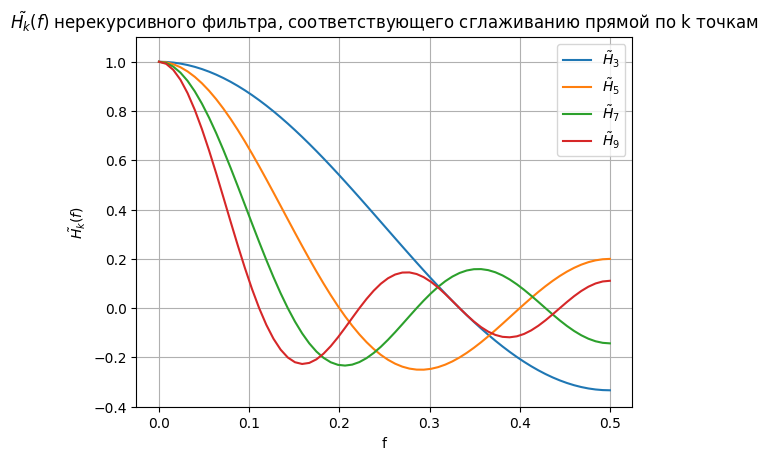

In [19]:
# Частоты f
frec = np.linspace(1e-10, .5, 64)

# Передаточная функция при сглаживании прямой по k точкам
def tilde_H_k(k, frec):
  return np.sin(k*math.pi*frec) / (k*np.sin(math.pi*frec))


# Построение графиков
plt.plot(frec, tilde_H_k(3, frec), label=r'$\tilde{H}_{3}$')
plt.plot(frec, tilde_H_k(5, frec), label=r'$\tilde{H}_{5}$')
plt.plot(frec, tilde_H_k(7, frec), label=r'$\tilde{H}_{7}$')
plt.plot(frec, tilde_H_k(9, frec), label=r'$\tilde{H}_{9}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -0.4, 1.1))
plt.title(r'$\tilde {H_k} (f)$ нерекурсивного фильтра, соответствующего сглаживанию прямой по k точкам')
plt.grid()
plt.show()

По полученному графику *__проинтерпретируем частотные свойства передаточных функций__* для различного количества точек.

Видим, что *__с увеличением числа точек__*(числа слагаемых передаточной функции):
*  уменьшается порядок касания в точке $f=0$
* увеличивается "крутизна" кривой в окрестности точки $f=0$
* увеличивается частота колебаний сигнала
* с увеличением частоты $f$ уменьшается амплитуда колебаний

---

#### 2. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом второй степени по 7, 9, 11 и 13 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Выведем формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом 2ой степени по $k$ точкам.

Пусть $s(t)$ – *входной сигнал*

&emsp;&emsp;&emsp; $y(t)=A+Bt+Ct^2$ – *выходной сигнал (сглаживание полиномом 2ой степени)*.

Приближение по МНК полиномом 2ой степени по $2m+1$ точкам:

$F(A,B)=\sum_{k=-m}^m(s_k-y_k)^2=\sum_{k=-m}^m(s_k-A-Bk-Ck^2)^2⟹min$

Продифференцировав по А и C и приравняв к нулю, получим систему нормальных уравнений:

$\begin{cases}
    \frac{∂F(A, B)}{∂A} = 0, \\
    \frac{∂F(A, B)}{∂C} = 0,
\end{cases}$ $⟺$ $\begin{cases}
    0 = -2 \sum_{k=-m}^{m} s_k-A-Bk-Ck^2 \ , \\
    0 = -2 \sum_{k=-m}^{m} \ s_kk^2-Ak^2-Bk^3-Ck^4,
\end{cases}$ $⟺$ <br>$⟺$ $\begin{cases}
    (2m+1)A + \frac{m(m+1)(2m+1)}{3}C= \sum_{k=-m}^{m} s_k \ , \\
    \frac{m(m+1)(2m+1)}{3}A + \frac{m(m+1)(2m+1)(3m^2+3m-1)}{15}C = \sum_{k=-m}^{m} \ s_kk^2,
\end{cases}$

Выразив А, получим $y_0$:

$$y_0=A=\frac{\sum_{k=-m}^{m} s_kk^2-\frac{3m^2+3m-1}{5} \cdot \sum_{k=-m}^{m}s_k}{\frac{m(m+1)(2m+1)}{3} - \frac{(3m^2+3m-1)(2m+1)}{5}}$$

Посчитаем для 7 точек:

$$y_7=A=\frac{\sum_{k=-3}^{3} s_kk^2-7 \sum_{k=-3}^{3}s_k}{28 - 49}=\frac{1}{21}(7 \sum_{k=-3}^{3}s_k - \sum_{k=-3}^{3} s_kk^2)=\frac{1}{21}(-2s_{-3}+3s_{-2}+6s_{-1}+7s_0+6s_{1}+3s_{2}-2s_{3})$$

**Тогда, в общем случае:** <br>
$y_n=\frac{1}{21}(-2s_{n-3}+3s_{n-2}+6s_{n-1}+7s_n+6s_{n+1}+3s_{n+2}-2s_{n+3})$

Воспользуемся $s_n=e^{i\omega n}$: <br>
$y_n=\frac{1}{21}\cdot e^{i\omega n}(-2e^{-3i \omega}+3e^{-2i \omega}+6e^{-i \omega}+7+6e^{i \omega}+3e^{2i \omega}-2e^{3i \omega})=H(ω)$ <br>
$H(ω)=\frac{1}{21}(7+12cos(ω)+6cos(2\omega)-4cos(3\omega))$

$H(\omega)=H(2πf)=\tilde H(f)$ <br>

Тогда **_формулы для передаточной функции нерекурсивного фильтра_**, соответствующего сглаживанию полиномом 2ой степени по $k$ точкам: <br>

$\tilde H_7(f)=\frac{1}{21}(7+12cos(2 \pi f)+6cos(4 \pi f)-4cos(6 \pi f))$<br>
$\tilde H_9(f)=\frac{1}{231}(59+108cos(2 \pi f)+78cos(4 \pi f)+28cos(6 \pi f)-42cos(8 \pi f))$<br>
$\tilde H_{11}(f)=\frac{1}{429}(89+168cos(2 \pi f)+138cos(4 \pi f)+88cos(6 \pi f)+18cos(8 \pi f)-72cos(10\pi f))$<br>
$\tilde H_{13}(f)=\frac{1}{143}(25+48cos(2 \pi f)+42cos(4 \pi f)+32cos(6 \pi f)+18cos(8 \pi f)-22cos(10 \pi f))$<br>

Построим их графики:

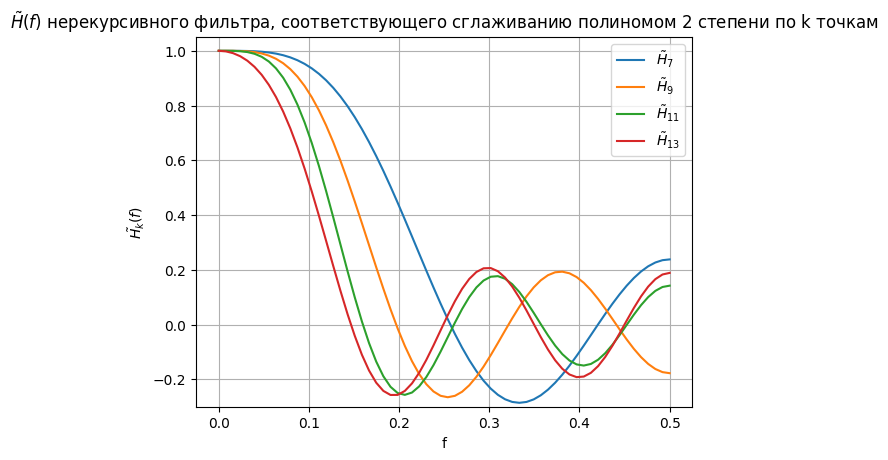

In [20]:
# Передаточные функции при сглаживании полиномом второй степени
tilde_H_7 = lambda fr: 1 / 21 * (7 + 12*np.cos(2*math.pi*fr) + 6*np.cos(4*math.pi*fr) - 4*np.cos(6*math.pi*fr))
tilde_H_9 = lambda fr: 1 / 231 * (59 + 108*np.cos(2*math.pi*fr) + 78*np.cos(4*math.pi*fr) + 28*np.cos(6*math.pi*fr) - 42*np.cos(8*math.pi*fr))
tilde_H_11 = lambda fr: 1 / 429 * (89 + 168*np.cos(2*math.pi*fr) + 138*np.cos(4*math.pi*fr) + 88*np.cos(6*math.pi*fr) + 18*np.cos(8*math.pi*fr) - 72*np.cos(10*math.pi*fr))
tilde_H_13 = lambda fr: 1 / 143 * (25 + 48*np.cos(2*math.pi*fr) + 42*np.cos(4*math.pi*fr) + 32*np.cos(6*math.pi*fr) + 18*np.cos(8*math.pi*fr) - 22*np.cos(10*math.pi*fr))
# Построение графиков
plt.plot(frec, tilde_H_7(frec), label=r'$\tilde{H}_{7}$')
plt.plot(frec, tilde_H_9(frec), label=r'$\tilde{H}_{9}$')
plt.plot(frec, tilde_H_11(frec), label=r'$\tilde{H}_{11}$')
plt.plot(frec, tilde_H_13(frec), label=r'$\tilde{H}_{13}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -0.3, 1.05))
plt.title(r'$\tilde {H} (f)$ нерекурсивного фильтра, соответствующего сглаживанию полиномом 2 степени по k точкам')
plt.grid()
plt.show()

По полученному графику *__проинтерпретируем частотные свойства передаточных функций__* для различного количества точек.

Видим, что *__с увеличением числа точек__*(числа слагаемых передаточной функции):
*  уменьшается порядок касания в точке $f=0$
* увеличивается "крутизна" кривой в окрестности точки $f=0$
* увеличивается частота колебаний сигнала
* с увеличением частоты $f$ **сильнее** уменьшается амплитуда колебаний

*__По сравнению со сглаживанием прямой линией__* - диапазон малых частот, которые почти не фильтруются, шире, чем при сглаживании прямой линией.



---

#### 3. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию полиномом четвёртой степени по 9, 11, 13 и 15 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Пусть $s(t)$ – *входной сигнал*

&emsp;&emsp;&emsp; $y(t)=A+Bt+Ct^2+Dt^3+Et^4$ – *выходной сигнал (сглаживание полиномом 4ой степени)*.

Приближение по МНК полиномом 4ой степени по $2m+1$ точкам:

$F(A,B,C,D,E) = \sum_{k=-m}^{k=m}(s_k-A-Bk-Ck^2-Dk^3-Ek^4)^2 \Rightarrow \min$

Продифференцировав по А, С, Е и приравняв к 0, получим систему нормальных уравнений:

$\begin{cases}
\dfrac{\delta F(A, B, C, D, E)}{\delta A} = 0\\
\dfrac{\delta F(A, B, C, D, E)}{\delta C} = 0\\
\dfrac{\delta F(A, B, C, D, E)}{\delta E} = 0\\
\end{cases}$ $⟺$ $\begin{cases}
-2 \sum\limits^{m}_{k = -m} (s_k - A - Bk - Ck^2 - Dk^3 - Ek^4) = 0\\
-2 \sum\limits^{m}_{k = -m} (k^2s_k - k^2A - Bk^3 - Ck^4 - Dk^5 - Ek^6) = 0\\
-2 \sum\limits^{m}_{k = -m} (k^4s_k - k^4A - Bk^5 - Ck^6 - Dk^7 - Ek^8) = 0\\
\end{cases}$

Получим $y_0$:

$y_0 = A = 15 \dfrac{(12 + 5m(1 + m)(-10 + 3m(1 + m)))\sum^m_{k = -m}s_k - 35(-3 +2m(1+m))\sum^m_{k = -m}k^2s_k - 63\sum^m_{k = -m}k^4s_k}{4(-3+2m)(-1+2m)(1+2m)(3 + 2m)(5 +2m)}$

$H(\omega) = \dfrac{1}{429}(179 + 270cos(\omega) + 60 cos(2\omega) - 110 cos(3\omega) + 30cos(4\omega))$

$H(\omega)=H(2πf)=\tilde H(f)$ <br>

Формулы для передаточной функции нерекурсивного фильтра при сглаживании полиномом 4ой степени:

* по 9 точкам:
$\tilde{H_9}(f) = \dfrac{1}{429}(179 + 270 cos(2\pi f) + 60 cos(4\pi f) − 110 cos(6\pi f)+ 30 cos(8\pi f))$

* по 11 точкам:
$\tilde{H_{11}}(f) = \dfrac{1}{429}(143 + 240 cos(2\pi f) + 120 cos(4\pi f) − 20 cos(6\pi f) - 90 cos(8\pi f) + 36 cos(10\pi f))$

* по 13 точкам:
$\tilde{H_{13}}(f) = \dfrac{1}{2434}(677 + 1200 cos(2\pi f) + 780 cos(4\pi f) + 220 cos(6\pi f) - 270 cos(8\pi f) - 396 cos(10\pi f) + 220cos(12\pi f))$

* по 15 точкам:
$\tilde{H_{15}}(f) = \dfrac{1}{46189}(11063 + 20250 cos(2\pi f) + 15000 cos(4\pi f)+ 7510 cos(6 \pi f) − 330 cos(8\pi f) − 5874 cos(10\pi f) - 5720 cos(12\pi f) + 4290 cos(14\pi f))$


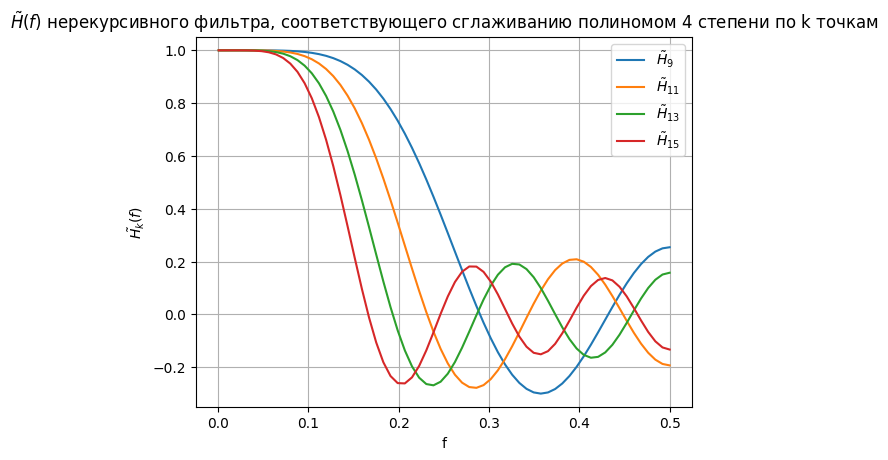

In [38]:
# Передаточные функции при сглаживании полиномом четвертой степени
fourth_H_9 = lambda fr: 1 / 429 * (179 + 270 * np.cos(2*math.pi*fr) + 60 * np.cos(4*math.pi*fr) - 110 * np.cos(6*math.pi*fr) + 30 * np.cos(8*math.pi*fr))
fourth_H_11 = lambda fr: 1 / 429 * (143 + 240 * np.cos(2*math.pi*fr) + 120 * np.cos(4*math.pi*fr) - 20 * np.cos(6*math.pi*fr) - 90 * np.cos(8*math.pi*fr) +
                            36 * np.cos(10*math.pi*fr))
fourth_H_13 = lambda fr: 1 / 2431 * (677 + 1200 * np.cos(2*math.pi*fr) + 780 * np.cos(4*math.pi*fr) + 220 * np.cos(6*math.pi*fr) - 270 * np.cos(8*math.pi*fr) -
                             396 * np.cos(10*math.pi*fr) + 220 * np.cos(12*math.pi*fr))
fourth_H_15 = lambda fr: 1 / 46189 * (11063 + 20250 * np.cos(2*math.pi*fr) + 15000 * np.cos(4*math.pi*fr) + 7510 * np.cos(6*math.pi*fr) - 330 * np.cos(8*math.pi*fr) -
                              5874 * np.cos(10*math.pi*fr) - 5720 * np.cos(12*math.pi*fr) + 4290 * np.cos(14*math.pi*fr))
# Построение графиков
plt.plot(frec, fourth_H_9(frec), label=r'$\tilde{H}_{9}$')
plt.plot(frec, fourth_H_11(frec), label=r'$\tilde{H}_{11}$')
plt.plot(frec, fourth_H_13(frec), label=r'$\tilde{H}_{13}$')
plt.plot(frec, fourth_H_15(frec), label=r'$\tilde{H}_{15}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -0.35, 1.05))
plt.title(r'$\tilde {H} (f)$ нерекурсивного фильтра, соответствующего сглаживанию полиномом 4 степени по k точкам')
plt.grid()
plt.show()

По полученному графику *__проинтерпретируем частотные свойства передаточных функций__* для различного количества точек.

Видим, что *__с увеличением числа точек__*(числа слагаемых передаточной функции):
*  уменьшается порядок касания в точке $f=0$
* увеличивается "крутизна" кривой в окрестности точки $f=0$
* увеличивается частота колебаний сигнала
* с увеличением частоты $f$ **сильнее** уменьшается амплитуда колебаний

---

#### 4. Вывести формулы для передаточной функции нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15 и 21 точкам. Построить графики $\tilde H(f)$. Проинтерпретировать частотные свойства передаточных функций для различного количества точек.

Формула Спенсера по 15 точкам:

$y_n = {1 \over 320}(-3s_{n-7} - 6s_{n-6} - 5s_{n-5} + 3s_{n-4} + 21s_{n-3} + 46s_{n-2} - 67s_{n-1} + 74s_n + 67s_{n+1} + 46s_{n+2} + 21s_{n+3} + 3s_{n+4} - 5s_{n+5} - 6s_{n+6} - 3s_{n+7})$

Формула Спенсера по 21 точке:

$y_n = {1 \over 350}(-s_{n-10} - 3s_{n-6} - 5s_{n-8} - 5s_{n-7} - 2s_{n-6} + 6s_{n-5} + 18s_{n-4} + 33s_{n-3} + 47s_{n-2} + 57s_{n-1} + 60s_n + 57s_{n+1} + 47s_{n+2} + 33s_{n+3} + 18s_{n+4} + 6s_{n+5} - 2s_{n+6} - 5s_{n+7} -5s_{n+8} -3s_{n+9} - s_{n+10})$

Тогда передаточные функции для них:

$\tilde H_{15}(f) = {1 \over 320}(74 + 134\cos(2\pi f) + 92\cos(4\pi f) + 42\cos(6\pi f) + 6\cos(8\pi f) - 10\cos(10\pi f) - 12\cos(12\pi f) - 6\cos(14\pi f))$


$\tilde H_{21}(f) = {1 \over 350}(60 + 114\cos(2\pi f) + 94\cos(4\pi f) + 66\cos(6\pi f) + 36\cos(8\pi f) + 12\cos(10\pi f) - 4\cos(12\pi f) - 10\cos(14\pi f) - 10\cos(16\pi f) - 6\cos(18\pi f) - 2\cos(20\pi f))$

Построим графики $\tilde H(f)$:

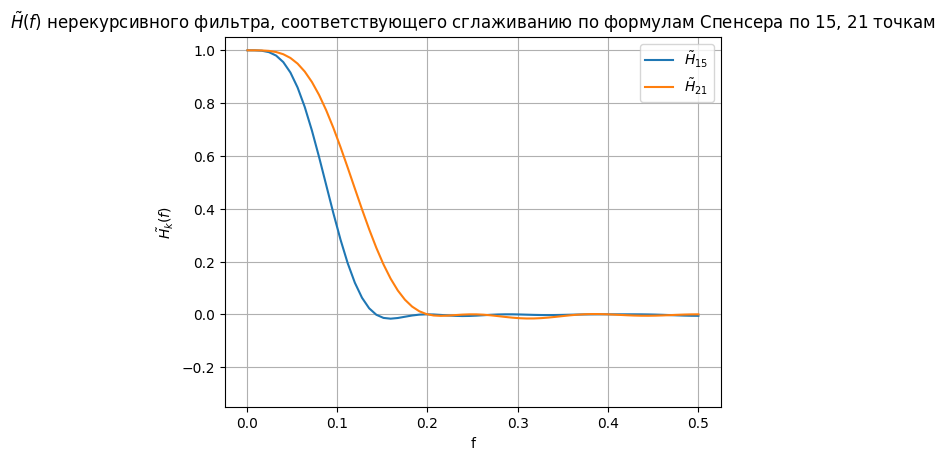

In [42]:
# Передаточные функции при сглаживании полиномом четвертой степени
tilde_H_15 = lambda fr: 1/350 * (60 + 114*np.cos(2*math.pi*fr) + 94*np.cos(4*math.pi*fr) + 66*np.cos(6*math.pi*fr) +
                          36*np.cos(8*math.pi*fr) + 12*np.cos(10*math.pi*fr) - 4*np.cos(12*math.pi*fr) - 10*np.cos(14*math.pi*fr) -
                          10*np.cos(16*math.pi*fr) - 6*np.cos(18*math.pi*fr) - 2*np.cos(20*math.pi*fr))
tilde_H_21 = lambda fr: 1/320 * (74 + 134*np.cos(2*math.pi*fr) + 92*np.cos(4*math.pi*fr) + 42*np.cos(6*math.pi*fr) +
                          6*np.cos(8*math.pi*fr) - 10*np.cos(10*math.pi*fr) - 12*np.cos(12*math.pi*fr) - 6*np.cos(14*math.pi*fr))

# Построение графиков
plt.plot(frec, tilde_H_15(frec), label=r'$\tilde{H}_{15}$')
plt.plot(frec, tilde_H_21(frec), label=r'$\tilde{H}_{21}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -0.35, 1.05))
plt.title(r'$\tilde {H} (f)$ нерекурсивного фильтра, соответствующего сглаживанию по формулам Спенсера по 15, 21 точкам')
plt.grid()
plt.show()

По полученному графику *__проинтерпретируем частотные свойства передаточных функций__* для 15 и 21 точек.

Первое, что можем заметить по полученному графику, что *__при сглаживании по формулам Спенсера__*, при превышении определенной частоты происходит *__стремительное уменьшение амплитуды__* колебаний, что выражено намного сильнее, чем при сглаживании в предыдущих пунктах.

Также, можем заметить, что при сглаживании по 15 точкам:
*  меньше порядок касания в точке $f=0$
* больше "крутизна" кривой в окрестности точки $f=0$
* с увеличением частоты $f$ уменьшение амплитуды колебаний происходит "быстрее", чем при сглаживании по 21 точке

---

#### 5. Построить графики из предыдущих пунктов в логарифмической шкале (Дб). Объясните, чем отличаются данные графики от полученных ранее и объясните их смысл.

Представим графики из предыдущих пунктов в логарифмической шкале (Дб), используя  следующую формулу:

$D [Дб]=10\lg(\frac{y_n}{s_n})=20\lg(\tilde H(f))$, где $y_n$ - выходной сигнал, $s_n$ - входной сигнал.

Таким образом, значение $D$ будет определять степень усиления/подавления входного сигнала $s_n$.

Графики, представленные в логарифмической шкале, в нашем случае оказались *__более информативными__*, поскольку:
* например, при визуализации с формулами Спенсера в линейной шкале, на высоких частотах колебания имеют крайне маленькую амплитуду, поэтому разглядеть изменения достаточно сложно при широком диапазоне значений
* в логарифмической же шкале значения на осях увеличиваются (или уменьшаются) в соответствии с логарифмической функцией, что позволяет *__отобразить более широкий диапазон значений без больших перепадов__* (например, $\tilde H(f)$) на одном графике
* на логарифмической шкале равные расстояния на графике соответствуют *__равным отношениям величин__*, поэтому с помощью графиков в логарифмической шкале *__легче оценить степень сглаживания__* входного сигнала при разных частотах

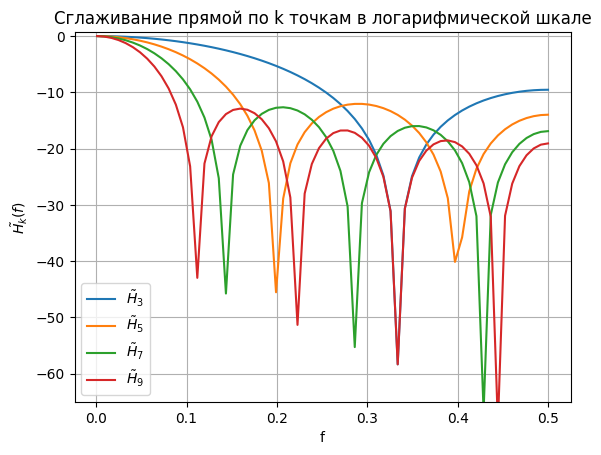

In [44]:
frec=np.linspace(0.001, 0.5, 64)
plt.plot(frec, 20*np.log10(np.abs(tilde_H_k(3, frec))), label=r'$\tilde{H}_{3}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_k(5, frec))), label=r'$\tilde{H}_{5}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_k(7, frec))), label=r'$\tilde{H}_{7}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_k(9, frec))), label=r'$\tilde{H}_{9}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -65, 0.7))
plt.title(r'Сглаживание прямой по k точкам в логарифмической шкале')
plt.grid()
plt.show()

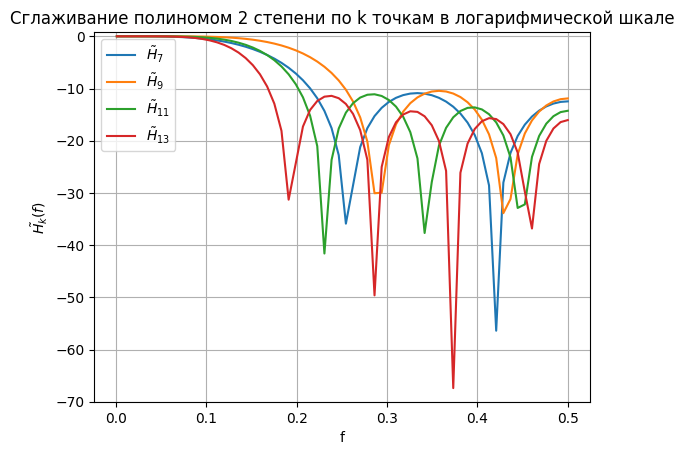

In [36]:
plt.plot(frec, 20*np.log10(np.abs(tilde_H_7(frec))), label=r'$\tilde{H}_{7}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_9(frec))), label=r'$\tilde{H}_{9}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_11(frec))), label=r'$\tilde{H}_{11}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_13(frec))), label=r'$\tilde{H}_{13}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -70, 0.8))
plt.title(r'Сглаживание полиномом 2 степени по k точкам в логарифмической шкале')
plt.grid()
plt.show()

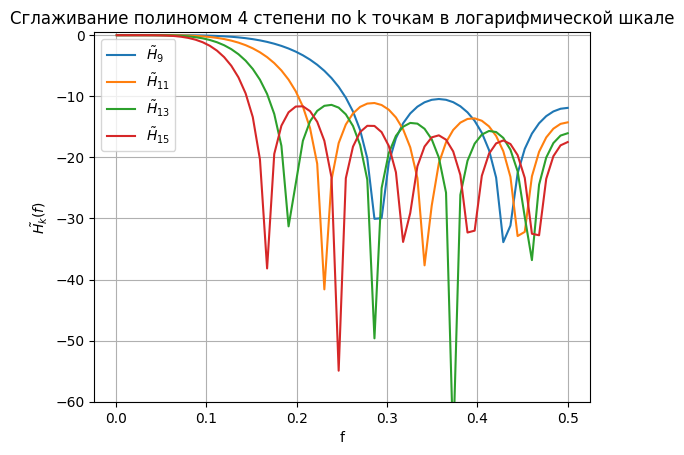

In [41]:
plt.plot(frec, 20*np.log10(np.abs(fourth_H_9(frec))), label=r'$\tilde{H}_{9}$')
plt.plot(frec, 20*np.log10(np.abs(fourth_H_11(frec))), label=r'$\tilde{H}_{11}$')
plt.plot(frec, 20*np.log10(np.abs(fourth_H_13(frec))), label=r'$\tilde{H}_{13}$')
plt.plot(frec, 20*np.log10(np.abs(fourth_H_15(frec))), label=r'$\tilde{H}_{15}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -60, 0.5))
plt.title(r'Cглаживание полиномом 4 степени по k точкам в логарифмической шкале')
plt.grid()
plt.show()

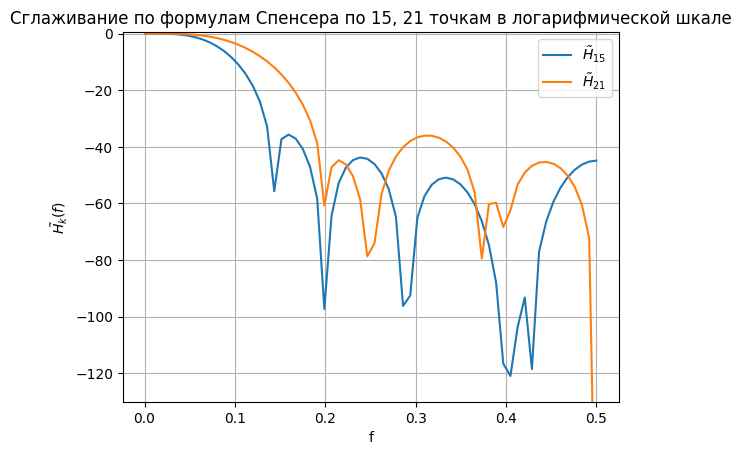

In [52]:
plt.plot(frec, 20*np.log10(np.abs(tilde_H_15(frec))), label=r'$\tilde{H}_{15}$')
plt.plot(frec, 20*np.log10(np.abs(tilde_H_21(frec))+1e-10), label=r'$\tilde{H}_{21}$')
plt.xlabel('f')
plt.ylabel(r'$\tilde{H_k}(f)$')
plt.legend()
x1, x2, y1, y2 = plt.axis()
plt.axis((x1, x2, -130, 0.5))
plt.title(r'Сглаживание по формулам Спенсера по 15, 21 точкам в логарифмической шкале')
plt.grid()
plt.show()

---

#### 6. Провести сопоставительный анализ свойств передаточных функций, полученных при выполнении п. 1–4.

Сравнивая свойства всех полученных передаточных функций можем выделить некоторые общие закономерности:
* при увеличении числа точек $k \uparrow$, по которым происходит сглаживание, увеличивается крутизна спада $\tilde H(f)$
*  при увеличении числа точек $k \uparrow$, по которым происходит сглаживание, также происходит более быстрое уменьшение колебательной амплитуды

Также можем заметить, что при использовании формул Спенсера, при превышении определенной частоты $f$ происходит *__стремительное уменьшение амплитуды__* колебаний, что выражено намного сильнее, чем при сглаживании в предыдущих нерекурсивных фильтрах.

---

## Выводы

&emsp;В результате выполненной работы были проанализированы частотные характеристики известных формул полиномиального сглаживания временных рядов.

&emsp; Были выведены и проанализированы формулы передаточных функций для различных нерекурсивных фильтров с отображением соответствующих графиков передаточных функций. Причем, графики были представлены как в линейной, так и в логарифмической шкале, поскольку в некоторых случаях амплитуда колебаний достаточно мала, чтобы разглядеть в линейной шкале изменения, когда данные имеют широкий диапазон значений и большие перепады.

&emsp; Также были проинтерпретированы и проведен сопоставительный анализ частотных свойств передаточных функций нерекурсивных фильтров для различного количества точек и выведены общие закономерности.



